In [1]:
# import necessary librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

%matplotlib inline

## Getting Started

In [2]:
# Load the housing dataset
data = pd.read_csv('train.csv')
prices = data['SalePrice']
features = data.drop(['Id', 'SalePrice'], axis = 1)

# Success
print("The dataset has {} data points with {} variables each.".format(*data.shape))
data.head(3)

The dataset has 1460 data points with 81 variables each.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Data Exploration

### Target variable

In this dataset, 'SalePrice' is the variable we need to predict. So let's do some analysis on this variable first.

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 180921.20 and sigma = 79415.29



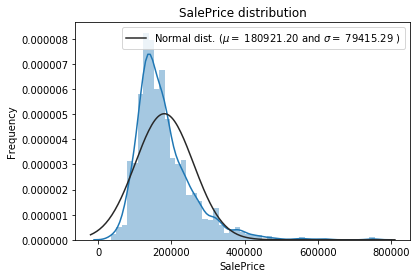

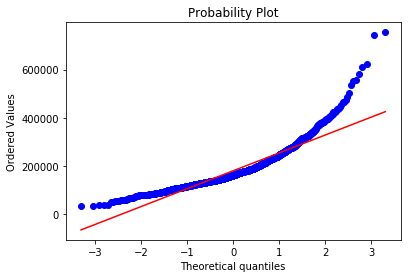

In [3]:
price = data['SalePrice']

sns.distplot(price , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(price)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(price, plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

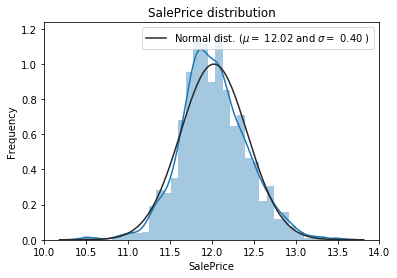

In [4]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
price = np.log1p(price)

#Check the new distribution 
sns.distplot(price , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(price)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

### Feature Observation

Now we take a look of the features.

In [5]:
#features = data.drop(['Id', 'SalePrice'], axis = 1)

print(features.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

***Data types***

In terms of data type, there are four big groups:

Continuous numerical features: lengths, areas, prices
Discrete numerical features: numerical scores, number of bedrooms, years; they support order and arithmetic operations, so they can be treated as numerical
Ordinal categorical features: features with qualitative scores(such as 'Excellent', 'Good' and 'Fair').
Purely categorical features: a few examples are 'MSSubClass' or 'SaleType'

* `MSSubClass`: Discrete numerical feature.
* `MSZoning`: Purely categorical feature.
* `LotFrontage`: Continuous numerical feature.
* `LotArea`: Continuous numerical feature.
* `Street`: Purely categorical feature.
* `Alley`: Purely categorical feature.
* `LotShape`: Purely categorical feature.
* `LandContour`: Purely categorical feature.
* `Utilities`: Purely categorical feature.
* `LotConfig`: Purely categorical feature.
* `LandSlope`: Purely categorical feature.
* `Neighborhood`: Purely categorical feature.
* `Condition1`: Purely categorical feature.
* `Condition2`: Purely categorical feature.
* `BldgType`: Purely categorical feature.
* `HouseStyle`: Purely categorical feature.
* `OverallQual`: Discrete numerical feature.
* `OverallCond`: Discrete numerical feature.
* `YearBuilt`: Discrete numerical feature.
* `YearRemodAdd`: Discrete numerical feature.
* `RoofStyle`: Purely categorical feature.
* `RoofMatl`: Purely categorical feature.
* `Exterior1st`: Purely categorical feature.
* `Exterior2nd`: Purely categorical feature.
* `MasVnrType`: Purely categorical feature.
* `MasVnrArea`: Continuous numerical feature.
* `ExterQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `ExterCond`: Ordinal categorical feature. TA, Gd, Ex, Fa and Po.
* `Foundation`: Purely categorical feature.
* `BsmtQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `BsmtCond`: Ordinal categorical feature. TA, Gd, Fa and Po.
* `BsmtExposure`: Ordinal categorical feature. No, Av, Gd and Mn.
* `BsmtFinType1`: Ordinal categorical feature. Unf, GLQ, ALQ, BLQ, Rec and LwQ.
* `BsmtFinSF1`: Continuous numerical feature.
* `BsmtFinType2`: Ordinal categorical feature. Unf, GLQ, ALQ, BLQ, Rec and LwQ.
* `BsmtFinSF2`: Continuous numerical feature.
* `BsmtUnfSF`: Continuous numerical feature.
* `TotalBsmtSF`: Continuous numerical feature.
* `Heating`: Purely categorical feature.
* `HeatingQC`: Ordinal categorical feature.
* `CentralAir`: Purely categorical feature. Y and N.
* `Electrical`: Purely categorical feature. SBrkr, FuseA, FuseF, FuseP and Mix.
* `1stFlrSF`: Continuous numerical feature.
* `2ndFlrSF`: Continuous numerical feature.
* `LowQualFinSF`: Continuous numerical feature.
* `GrLivArea`: Continuous numerical feature.
* `BsmtFullBath`: Discrete numerical feature. 0, 1, 2 and 3.
* `BsmtHalfBath`: Discrete numerical feature. 0, 1 and 2.
* `FullBath`: Discrete numerical feature. 0, 1, 2 and 3.
* `HalfBath`: Discrete numerical feature. 0, 1 and 2.
* `BedroomAbvGr`: Discrete numerical feature. 0 to 8.
* `KitchenAbvGr`: Discrete numerical feature. 0, 1, 2 and 3.
* `KitchenQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `TotRmsAbvGrd`: Discrete numerical feature. 2 to 14.
* `Functional`: Purely categorical feature. Typ, Min1, Min2, Mod, Maj1, Maj2 and Sev.
* `Fireplaces`: Discrete numerical feature. 0, 1, 2 and 3.
* `FireplaceQu`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `GarageType`: Purely categorical feature. Attchd, Detchd, BuiltIn, Basment, CarPort and 2Types.
* `GarageYrBlt`: Discrete numerical feature.
* `GarageFinish`: Purely categorical feature. Unf, RFn and Fin.
* `GarageCars`: Discrete numerical feature. 0 to 4.
* `GarageArea`: Continuous numerical feature.
* `GarageQual`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `GarageCond`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `PavedDrive`: Discrete numerical feature. Y, N and P.
* `WoodDeckSF`: Continuous numerical feature.
* `OpenPorchSF`: Continuous numerical feature.
* `EnclosedPorch`: Continuous numerical feature.
* `3SsnPorch`: Continuous numerical feature.
* `ScreenPorch`: Continuous numerical feature.
* `PoolArea`: Continuous numerical feature.
* `PoolQC`: Ordinal categorical feature. Gd, Ex and Fa.
* `Fence`: Ordinal categorical feature. MnPrv, GdPrv, GdWo and MnWw.
* `MiscFeature`: Purely categorical feature. Shed, Gar2, Othr and TenC.
* `MiscVal`: Continuous numerical feature.
* `MoSold`: Discrete numerical feature. 1 to 12 month.
* `YrSold`: Discrete numerical feature.
* `SaleType`: Purely categorical feature. WD, New, COD, etc.
* `SaleCondition`: Purely categorical feature. Normal, Partial, Abnorml, Family, Alloca and AdjLand.

## Missing values

In [54]:
nans = pd.isnull(features).sum()
nans[nans > 0].sort_values(ascending = False)

Series([], dtype: int64)

ValueError: min() arg is an empty sequence

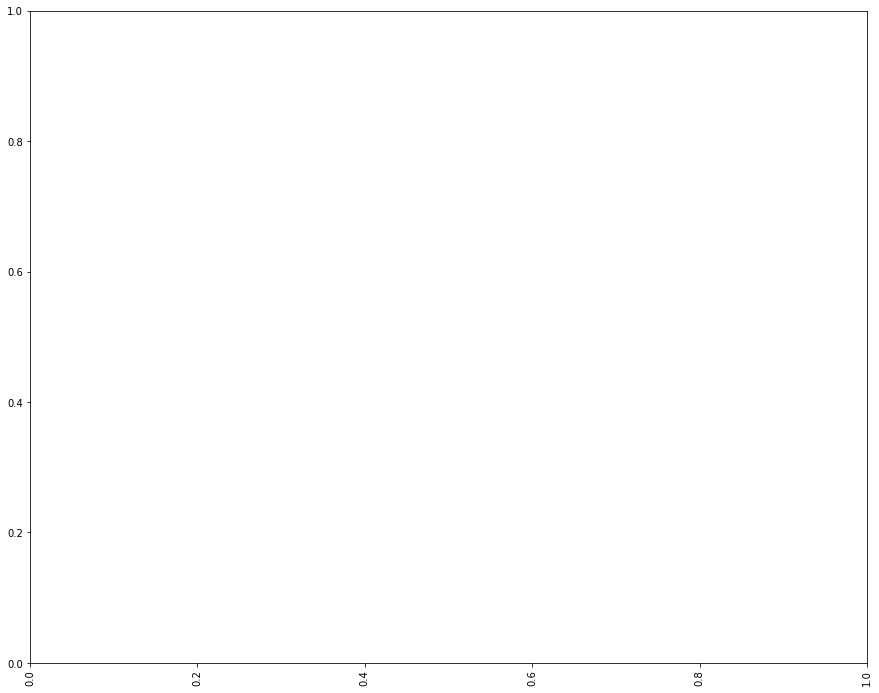

In [55]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=nans[nans > 0].index, y=nans[nans > 0])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

The meaning of missing values in each feature:

`PoolQC`: No pool, replacing missing data with None.

`MiscFeature`: No misc feature, replacing missing data with None.

`Alley`: No alley access, replacing missing data with None.

`Fence`: No fence, replacing missing data with None.

`FireplaceQu`: No fireplace, replacing missing data with None.

`LotFrontage`: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

`GarageYrBlt`: No Garage, replacing missing data with None.

`GarageType`: No Garage, replacing missing data with None.

`GarageFinish`: No Garage, replacing missing data with None.

`GarageQual`: No Garage, replacing missing data with None.

`GarageCond`: No Garage, replacing missing data with None.

`BsmtFinType2`: No basement, replacing missing data with None.

`BsmtExposure`: No basement, replacing missing data with None.

`BsmtFinType1`: No basement, replacing missing data with None.

`BsmtCond`: No basement, replacing missing data with None.

`BsmtQual`: No basement, replacing missing data with None.

`MasVnrArea`: No masonry veneer, replacing missing data with 0.

`MasVnrType`: No masonry veneer, replacing missing data with None.

`Electrical`: Replace missing data with the most common value.


In [8]:
cols_fill_with_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageYrBlt','GarageType',
                     'GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtExposure','BsmtFinType1',
                     'BsmtCond','BsmtQual','MasVnrType']
for col in cols_fill_with_none:
    features[col] = features[col].fillna('None')

    
# LotFrontage
features['LotFrontage'] = features.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# MasVnrArea
features['MasVnrArea'] = features['MasVnrArea'].fillna(0)

# Electrical
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

## Adjusting the type of variableData transformation

There are a few features that are not represented with the right type of variable:

- `MSSubClass`: represented as an integer, when it is just a category label (we will use 'object' for now)
- `MoSold`: represented as an integer, a month is just a category label out of 12 possibilities (we will use 'object' for now)
- `BsmtFullBath`, `BsmtHalfBath`: these two represent integers and not floats (or I at least I do not know what a third of half bathroom is)
- years: a year, in the context of this dataset, is an integer, and not a float
- 'GarageCars': represented as a float, it is an actual integer (nobody wants to have 0.5 car at home)

In [9]:
features['MSSubClass'] = features['MSSubClass'].astype('object', copy=False)
features['MoSold'] = features['MoSold'].astype('object', copy=False)
features['BsmtFullBath'] = features['BsmtFullBath'].astype('int64', copy=False)
features['BsmtHalfBath'] = features['BsmtHalfBath'].astype('int64', copy=False)
features['GarageCars'] = features['GarageCars'].astype('int64', copy=False)
#years = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
#data[years] = data[years].astype('int64', copy=False)

## Skewed features

In [10]:
numeric_feats = features.dtypes[features.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = features[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [11]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lm = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    features[feat] = boxcox1p(features[feat], lm)

 ## Dummy encoding

In [12]:
final_data = pd.get_dummies(features)
print(final_data.shape)

(1460, 424)


In [13]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, SGDRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
#import xgboost as xgb
#import lightgbm as lgb

### Performance Metric

### Define a cross validation strategy

In [14]:
X_train, X_test, y_train, y_test = train_test_split(final_data, price, test_size=0.25, random_state=42)

#Validation function
n_folds = 4

def r2_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv = kf)
    return(r2_scores)

### Benchmark Model: Lasso

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso()
score = r2_cv(lasso)
print("\nLasso score: {:.4f}".format(score.mean()))


Lasso score: -0.0044


In [16]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
score = r2_cv(dtr)
print("dtr score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

dtr score: 0.7284 (0.0265)



In [17]:
from sklearn.svm import SVR

svr = SVR()
score = r2_cv(svr)
print("svr score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

svr score: 0.8499 (0.0339)



In [18]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
score = r2_cv(ada)
print("ada score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ada score: 0.7982 (0.0185)



In [19]:
from sklearn.kernel_ridge import KernelRidge

KRR = KernelRidge()
score = r2_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.8591 (0.0362)



In [20]:
GBoost = GradientBoostingRegressor()
score = r2_cv(GBoost)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.8747 (0.0380)



### Model Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

#'loss': ['ls', 'lad', 'huber', 'quantile'],
reg = GradientBoostingRegressor()

param_grid = { 'n_estimators': [300,500,800], 
              'alpha': [0.5,0.7,0.9],
              'max_depth': [3,5,8], 
              'learning_rate': [0.05,0.1,0.2] }

grid_obj = GridSearchCV(reg, param_grid=param_grid, scoring='r2', cv=5)

grid_fit = grid_obj.fit(X_train, y_train)

best_reg = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (reg.fit(X_train, y_train)).predict(X_test)
best_predictions = best_reg.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print(r2_score(y_test, predictions))
print("\nOptimized Model\n------")
print(r2_score(y_test, best_predictions))

Unoptimized model
------
0.9005532673070311

Optimized Model
------
0.9081757574010025


In [44]:
grid_obj.best_params_

{'alpha': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 800}

Unoptimized model

0.9005532673070311

Optimized Model

0.9081757574010025

{'alpha': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 800}

In [41]:
regg = GradientBoostingRegressor(loss='ls', learning_rate=0.1, 
                                 n_estimators=1000, subsample=1.0, 
                                 criterion='friedman_mse', min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                 max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, 
                                 init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, 
                                 max_leaf_nodes=None, warm_start=False, presort='auto')

predictionss = (regg.fit(X_train, y_train)).predict(X_test)
print(r2_score(y_test, predictionss))

0.9061896942196923
